HEART DISEASE PREDICTION USING LOGISTIC REGRESSION 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#LOADING DATASET
disease_df = pd.read_csv("csv_files/framingham.csv")
disease_df.drop(columns=['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [3]:
disease_df.head(50)

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
disease_df.dropna(axis = 0, inplace = True)
disease_df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [5]:
print(disease_df.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


In [6]:
#Splitting data into test and train set
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


Exploratory Data Analysis of Heart Disease Dataset

C:\Users\USER\AppData\Local\Temp\ipykernel_6420\4266678475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")


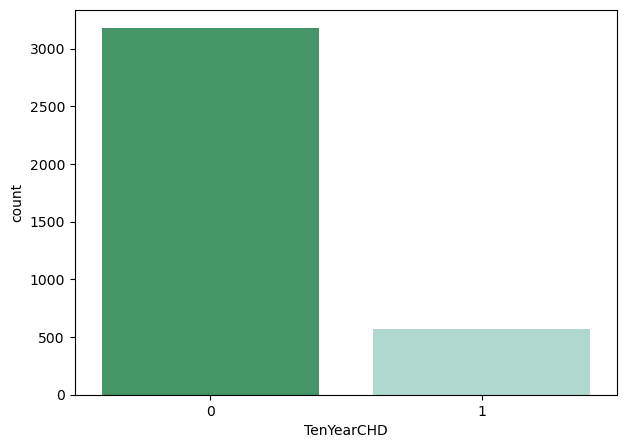

In [9]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")
plt.show()

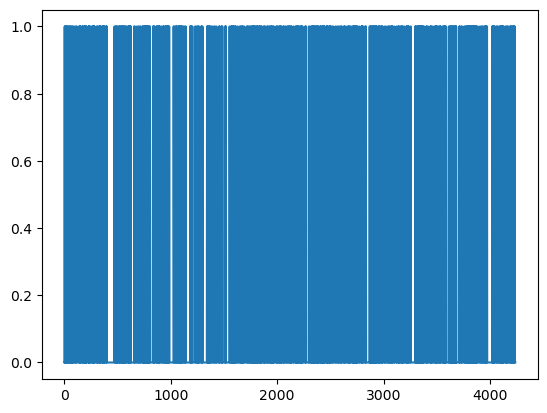

In [10]:
#Counting number of patients affected by CHD where (0= Not Affected; 1= Affected)
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

Fitting Logistic Regression Model for Heart Disease Prediction

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [12]:
#Evaluating logistic regression model
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', 
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8490230905861457


The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



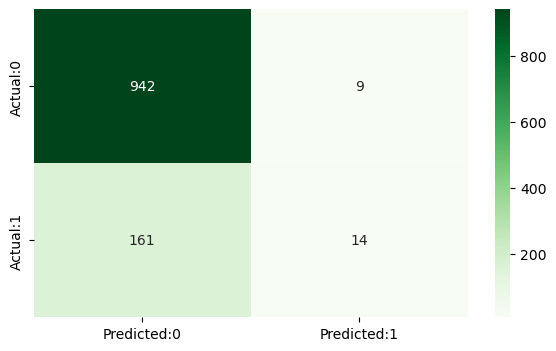

In [14]:
#PLOTTING CONFUSION MATRIX
from sklearn.metrics import confusion_matrix, classification_report

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (7, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()